# Assignment 4, Homework 4

### Set work environment and import data into this notebook:

In [1]:
import pylab as pl
import numpy as np
%pylab inline

import os
import json

from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd

#opening file into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
data = pd.read_csv(citibikedata)
data.head()

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


### Manipulate dataset for this project:

In [4]:
# create new columns:
##populated with age (2016 minus birth year)
##code gender into numbers (1 = male, 2 = female)

data['ageM'] = 2016 - data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 1)]
data['ageF'] = 2016 - data['birth year'][(data['usertype'] == 'Subscriber') & (data['gender'] == 2)]
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,44.0,NaN
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0,NaN
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,27.0,NaN
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,25.0,NaN
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,27.0,NaN


In [10]:
#explore data
data.describe()

/opt/rh/anaconda/root/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.265112e+06,1.460318e+06,947425.000000,314575.000000
mean,9.897580e+02,9.562393e+02,4.073736e+01,-7.398694e+01,9.457872e+02,4.073696e+01,-7.398677e+01,2.051037e+04,1.977659e+03,1.079696e+00,38.743638,37.081971
std,7.589179e+03,1.101579e+03,2.277217e-02,1.641347e-02,1.093657e+03,7.874038e-02,1.378920e-01,3.454210e+03,1.157717e+01,5.872326e-01,11.606224,11.291810
min,6.100000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00,16.000000,16.000000
25%,4.050000e+02,3.280000e+02,4.072080e+01,-7.399906e+01,3.280000e+02,4.072066e+01,-7.399915e+01,1.748200e+04,NaN,1.000000e+00,NaN,NaN
50%,6.760000e+02,4.530000e+02,4.073818e+01,-7.398890e+01,4.500000e+02,4.073782e+01,-7.398890e+01,2.052900e+04,NaN,1.000000e+00,NaN,NaN
75%,1.143000e+03,5.300000e+02,4.075383e+01,-7.397769e+01,5.290000e+02,4.075300e+01,-7.397771e+01,2.362800e+04,NaN,1.000000e+00,NaN,NaN
max,3.129291e+06,3.260000e+03,4.078721e+01,-7.392989e+01,3.260000e+03,4.078721e+01,0.000000e+00,2.603700e+04,2.000000e+03,2.000000e+00,131.000000,129.000000


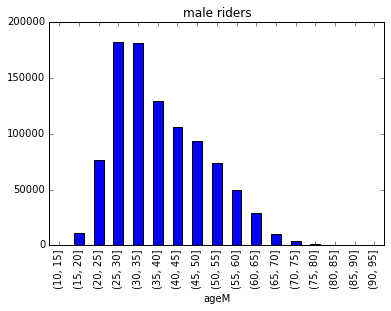

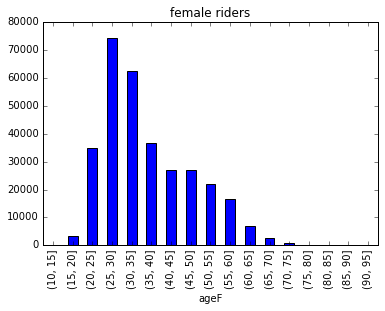

In [11]:
# plot histograms with pandas

#first organize data into bins: start = 10, stop = 99, step = 5
bins = np.arange(10, 99, 5)
axM = data.ageM.groupby(pd.cut(data.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axM.set_title("male riders")

axF = data.ageF.groupby(pd.cut(data.ageF, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001804
(20, 25]       0.028723
(25, 30]       0.072360
(30, 35]       0.080015
(35, 40]       0.059895
(40, 45]       0.034306
(45, 50]       0.021237
(50, 55]       0.013730
(55, 60]       0.013854
(60, 65]       0.005400
(65, 70]       0.002165
(70, 75]       0.000173
(75, 80]       0.000019
(80, 85]       0.000061
(85, 90]       0.000010
(90, 95]       0.000000


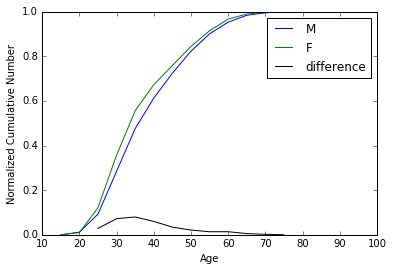

In [12]:
#return normalized cumulative number of Cibike riders for ageM and ageF

csM=data.ageM.groupby(pd.cut(data.ageM, bins)).agg([count_nonzero]).cumsum()

csF=data.ageF.groupby(pd.cut(data.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-', label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## KS tests to compare 2 samples

In [14]:
import scipy.stats

ks = scipy.stats.ks_2samp(data.ageM, data.ageF)
print (ks)

Ks_2sampResult(statistic=0.082706883585128677, pvalue=0.0)


The p-value obtained in this analysis is 0.0, which is less than 0.05 and allows us to reject the null hypothesis. This indicates that the distributions are the same.

## Pearson Test:

In [17]:
#subset data using np.arange:
subdata = data.iloc[np.arange(1,len(data),200),:]
subdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0,NaN
201,1282,6/1/2016 00:33:43,6/1/2016 00:55:05,3085,Roebling St & N 4 St,40.714690,-73.957390,317,E 6 St & Avenue B,40.724537,-73.981854,19584,Subscriber,1991.0,2,NaN,25.0
401,968,6/1/2016 01:25:22,6/1/2016 01:41:30,3061,Throop Ave & Myrtle Ave,40.696229,-73.943711,143,Clinton St & Joralemon St,40.692395,-73.993379,22930,Subscriber,1985.0,1,31.0,NaN
601,336,6/1/2016 04:03:35,6/1/2016 04:09:11,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3073,Division Ave & Hooper St,40.706913,-73.954417,24019,Subscriber,1988.0,1,28.0,NaN
801,396,6/1/2016 05:41:57,6/1/2016 05:48:34,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,352,W 56 St & 6 Ave,40.763406,-73.977225,24323,Subscriber,1976.0,1,40.0,NaN


In [18]:
#before sorting:
ks_sub = scipy.stats.ks_2samp(subdata.ageM, subdata.ageF)
print (ks_sub)

Ks_2sampResult(statistic=0.4433032046014791, pvalue=0.0)


In [53]:
#reindex data: 
data.ageM.index = range(1,len(data.ageM)+1)

In [54]:
#explore data:
count = np.linspace(1,len(data.ageM),len(data.ageF)).astype(int)
new_m = data.ageM[count]
new_m.head()

1     44.0
4     25.0
7     30.0
10    52.0
13    34.0
Name: ageM, dtype: float64

In [55]:
new_m[new_m.isnull() == True]

Series([], Name: ageM, dtype: float64)

In [43]:
#make sure new male data is same size as female data:
len(new_m)

314575

In [61]:
#sort data by first copying data and then sort by ascending values:
fcopy = data.ageF.copy()
fcopy.sort_values(ascending = True, inplace = True)

mcopy = new_m.copy()
mcopy.sort_values(ascending = True, inplace = True)

In [62]:
#perform test:
pearson = scipy.stats.pearsonr(mcopy, fcopy)
print(pearson)

(0.99581428637751845, 0.0)


This test returned a correlation coefficient very close to one, implying that the two distributions are extremely similar. This means that we can reject the null hypothesis.

### Spearman Test:

In [63]:
#perform test:
spearman = scipy.stats.spearmanr(mcopy, fcopy)
print(spearman)

SpearmanrResult(correlation=0.99905949717534936, pvalue=0.0)


This test returned a correlation coefficient again of almost one, which implies that the two distributions are very similar and we can reject the null hypothesis.